In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import zipfile

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='malgun gothic')    # 한글처리
plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [4]:
anscombe = sns.load_dataset('anscombe')
anscombe 

## Seaborn 패키지에서 제공되는 샘플 데이터셋 중 하나로, 
## 1973년에 F.J. Anscombe이 발표한 논문에서 사용된 것
## 각각 11개의 관측치로 구성된 4개의 데이터 그룹

## dataset: 데이터셋의 번호 (I,II,III,IV)
## x: 독립 변수의 값
## y: 종속 변수의 값


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


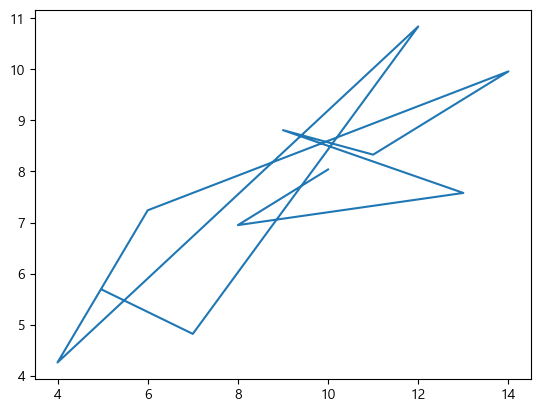

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

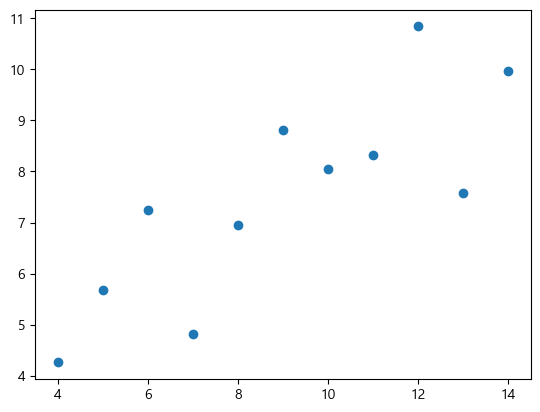

In [6]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')
plt.show()

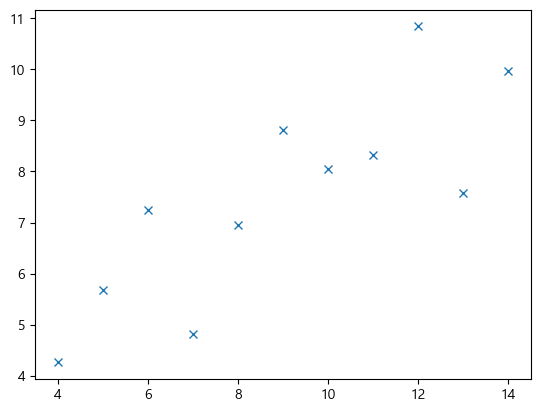

In [7]:
plt.plot(dataset_1['x'], dataset_1['y'],'x')
plt.show()

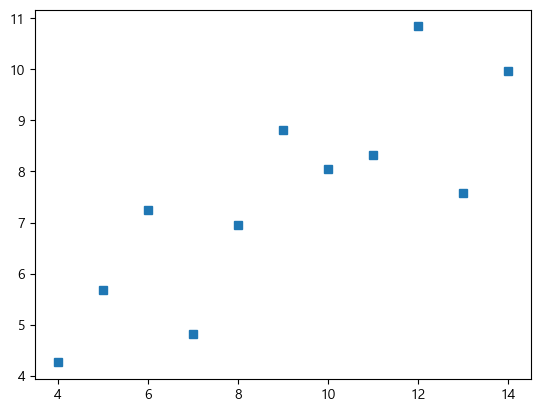

In [8]:
plt.plot(dataset_1['x'], dataset_1['y'],'s')
plt.show()

In [9]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

### 그림영역과 하위 그래프

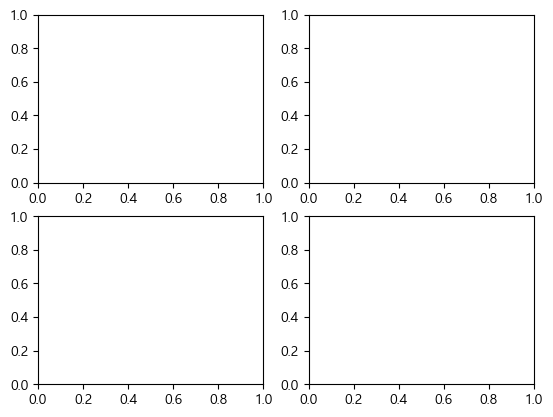

In [10]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
plt.show()

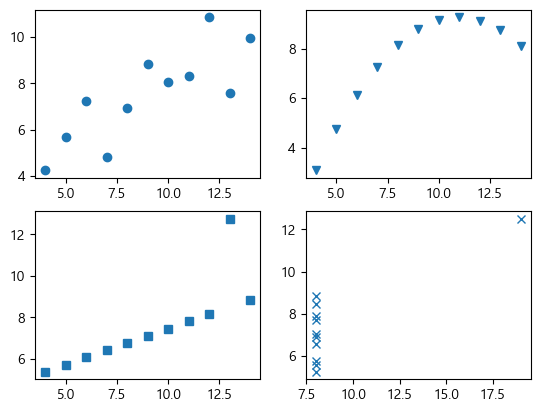

In [13]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'v')
axes3.plot(dataset_3['x'], dataset_3['y'],'s')
axes4.plot(dataset_4['x'], dataset_4['y'],'x')


plt.show()

# 's' : 사각형(square)
# 'p' : 오각형(pentagon)
# 'h' : 육각형(hexagon)
# 'D' : 마름모(diamond)
# 'v' : 아래쪽 삼각형(triangle_down)
# '>' : 오른쪽 삼각형(triangle_right)
# '<' : 왼쪽 삼각형(triangle_left)
# '*' : 별(star)
# 'x' : 엑스(X)표시
# '+' : 플러스(plus)

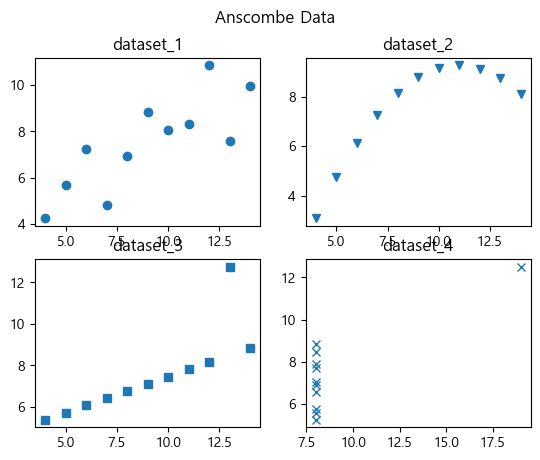

In [14]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'v')
axes3.plot(dataset_3['x'], dataset_3['y'],'s')
axes4.plot(dataset_4['x'], dataset_4['y'],'x')

axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')

plt.show()

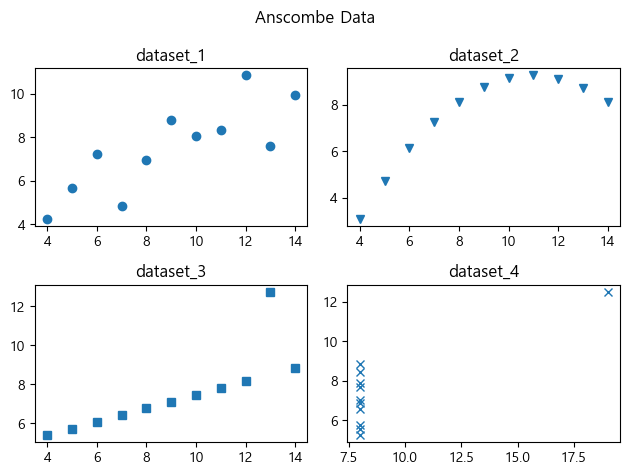

In [15]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'v')
axes3.plot(dataset_3['x'], dataset_3['y'],'s')
axes4.plot(dataset_4['x'], dataset_4['y'],'x')

axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')

fig.set_tight_layout(True)

plt.show()

## matplotlib

In [16]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 일변량 그래프 그리기

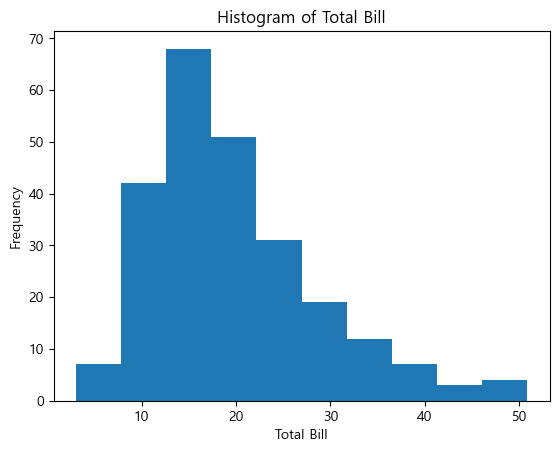

In [17]:
## 히스토 그램

fig = plt.figure()

axes1 = fig.add_subplot(1,1,1)
axes1.hist(data = tips, x = 'total_bill', bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')
plt.show()


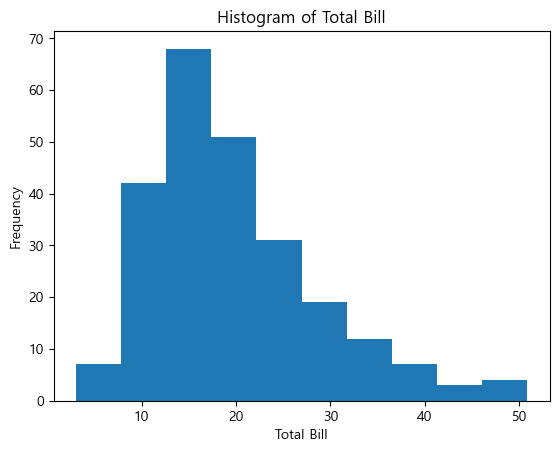

In [20]:
plt.hist(data = tips, x = 'total_bill', bins = 10 )
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

## 이변량 그래프

Text(0, 0.5, 'Tip')

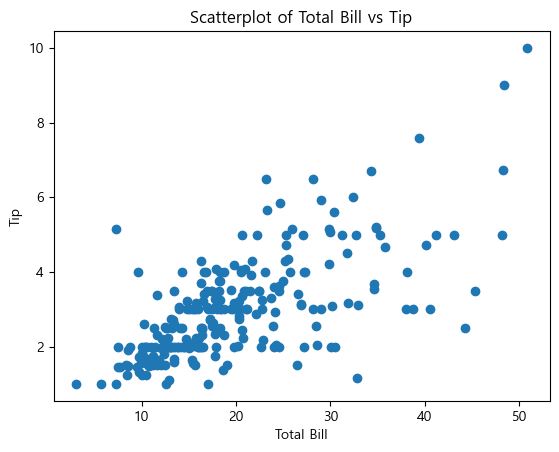

In [21]:
## 산점도

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(tips['total_bill'], tips['tip'])

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

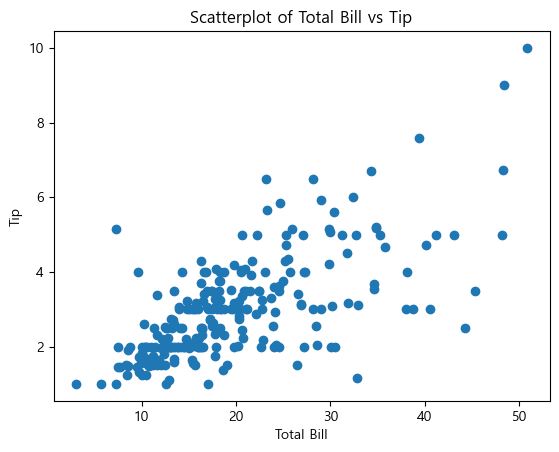

In [24]:
plt.scatter(data = tips , x = 'total_bill', y = 'tip')
plt.title('Scatterplot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

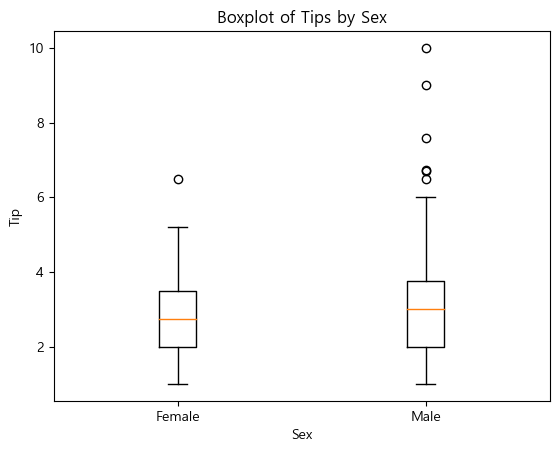

In [26]:
## Boxplot

boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

axes1.boxplot(
    x=[ tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
      ],
      labels=['Female', 'Male']
            )

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
plt.show()

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

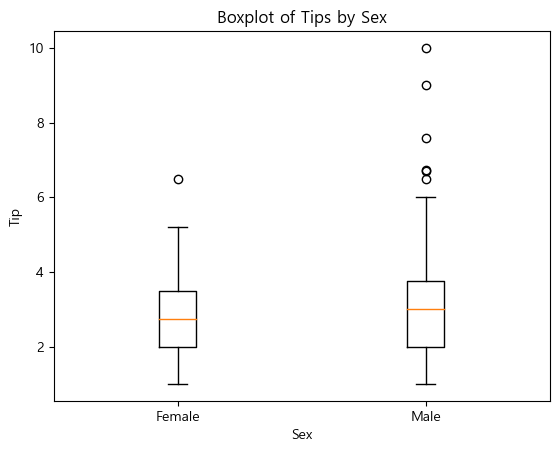

In [28]:
plt.boxplot( 
      [ tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip']
      ],
      labels=['Female', 'Male']
            )

plt.xlabel('Sex')
plt.ylabel('Tip')
plt.title('Boxplot of Tips by Sex')

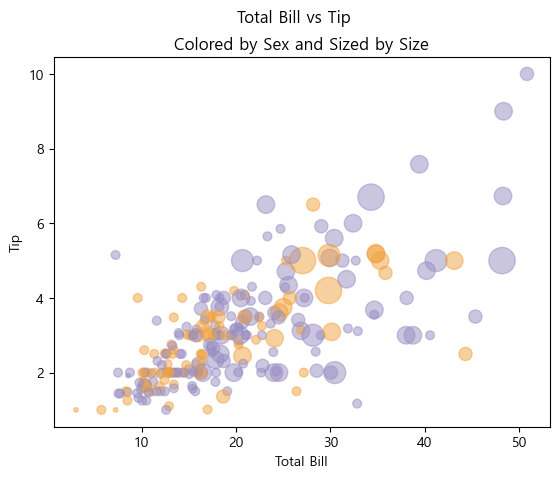

In [36]:
## 변수가 여러개인 Scatter 

colors = {'Female': '#f1a340', 'Male' : '#998ec3'} #naver rgb값 검색, 또는 그림판 색편집

plt.scatter ( data = tips,
             x = 'total_bill',
             y = 'tip',
             s = tips['size']**2*10,
             c=tips['sex'].map(colors),
             alpha = 0.5 )
                      
plt.title('Colored by Sex and Sized by Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.suptitle('Total Bill vs Tip')
plt.show()

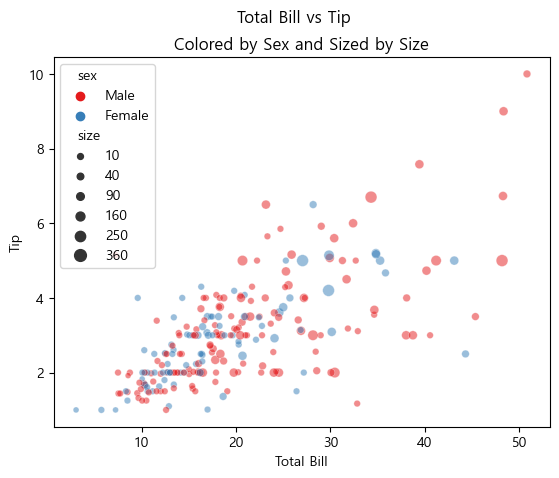

In [40]:
# colors = {'Female': '#f1a340', 'Male' : '#998ec3'} #naver rgb값 검색, 또는 그림판 색편집

# # plt.scatter ( data = tips,
# #              x = 'total_bill',
# #              y = 'tip',
# #              s = tips['size']**2*10,
# #              c = tips['sex'].map(colors),
# #              alpha = 0.5 )

sns.scatterplot(data = tips,
             x = 'total_bill',
             y = 'tip',
             size = tips['size']**2*10, # 또는 'size'
             hue = 'sex',
             palette = 'Set1',
             alpha = 0.5 )

plt.title('Colored by Sex and Sized by Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.suptitle('Total Bill vs Tip')
plt.show()

## seaborn

In [41]:
tips = sns.load_dataset('tips')

In [42]:
sns.set_context('paper')

# paper : 보고서에 적합한 Graph
# notebook : 노트북에서 사용하기 적합한 Graph
# talk : 발표용이나 대화식 환경에 사용이 적당한 Graph
# poster : 포스터나 큰화면에서 사용하기 적당한 Graph

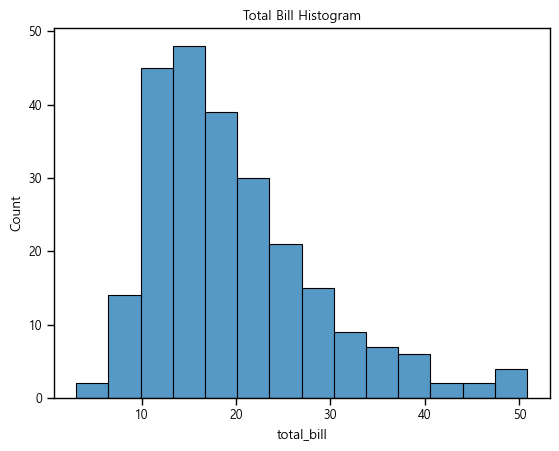

In [43]:
# 일변량 그래프 (히스토그램)

hist, ax = plt.subplots()

sns.histplot(data = tips, x = 'total_bill', ax = ax)
ax.set_title('Total Bill Histogram')
plt.show()

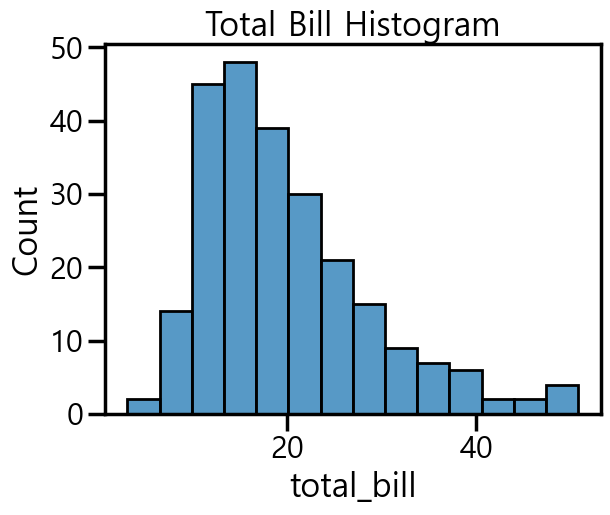

In [44]:
sns.set_context('poster')
hist, ax = plt.subplots()

sns.histplot(data = tips, x = 'total_bill', ax = ax)
ax.set_title('Total Bill Histogram')
plt.show()

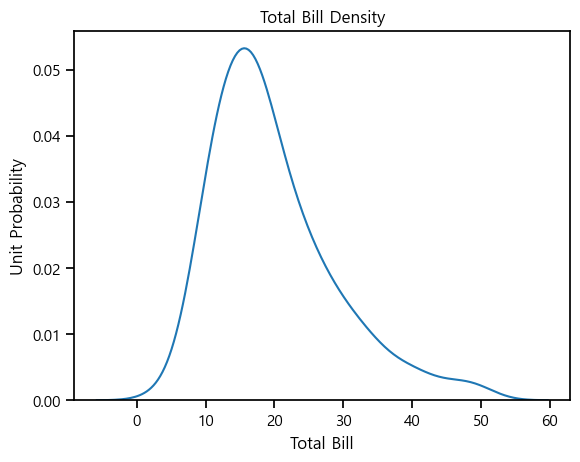

In [46]:
## 밀도분표 Graph
sns.set_context('notebook')

den, ax = plt.subplots()

sns.kdeplot(data = tips, x = 'total_bill', ax = ax)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show() 

## 커널 밀도 추정(Kernel Density Estimation)
## 주어진 데이터의 분포를 나타내는 밀도를 추정하고, 곡선으로 표현

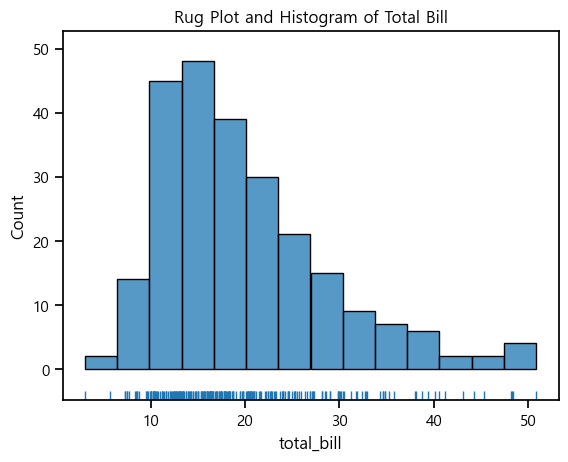

In [47]:
## 러그 Graph

rug, ax = plt.subplots()

sns.rugplot(data = tips, x = 'total_bill', ax = ax)
sns.histplot(data = tips, x = 'total_bill', ax = ax)

ax.set_title('Rug Plot and Histogram of Total Bill')

plt.show() 

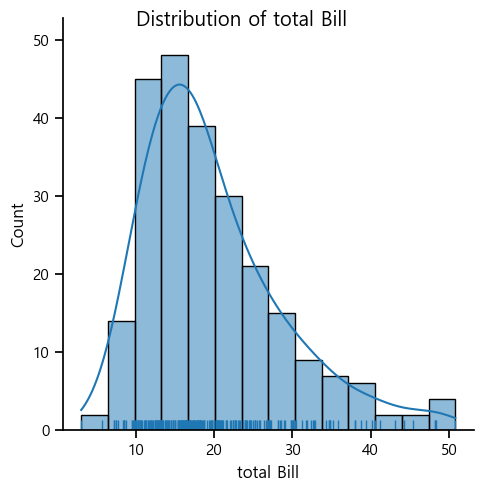

In [48]:
## 모두 합치기

fig = sns.displot(data = tips, x = 'total_bill', kde = True, rug = True)
fig.set_axis_labels(x_var = "total Bill", y_var = 'Count')
fig.figure.suptitle('Distribution of total Bill')

plt.show()

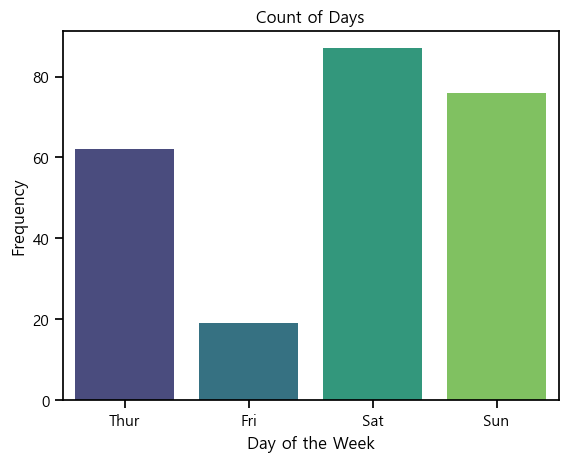

In [49]:
## 막대그래프

count, ax = plt.subplots()

sns.countplot(data = tips, x = 'day', palette = 'viridis', ax = ax)

ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

plt.show() 

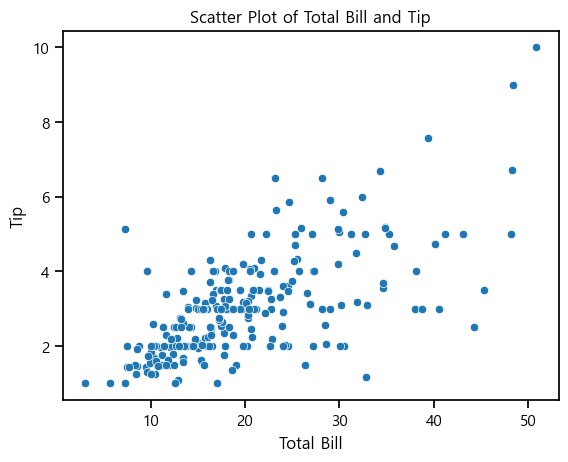

In [51]:
##이변량 그래프 (산점도 1)

scatter, ax = plt.subplots()

sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax)

ax.set_title('Scatter Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

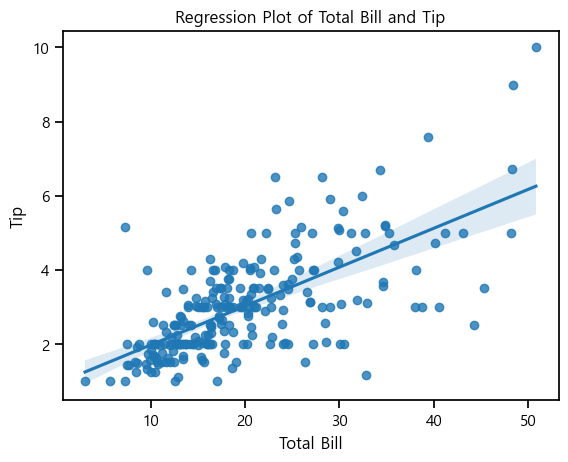

In [53]:
##이변량 그래프 (산점도 2)

reg, ax = plt.subplots()

sns.regplot(data=tips, x='total_bill', y='tip', ax=ax)

ax.set_title('Regression Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show() # 회귀선, 범위는 신뢰구간임.

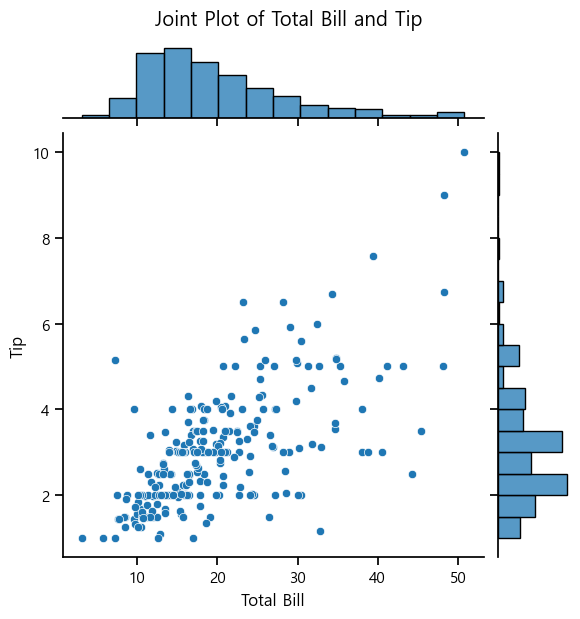

In [54]:
## 조인트 그래프

joint = sns.jointplot(data=tips, x='total_bill', y='tip')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

joint.figure.suptitle('Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

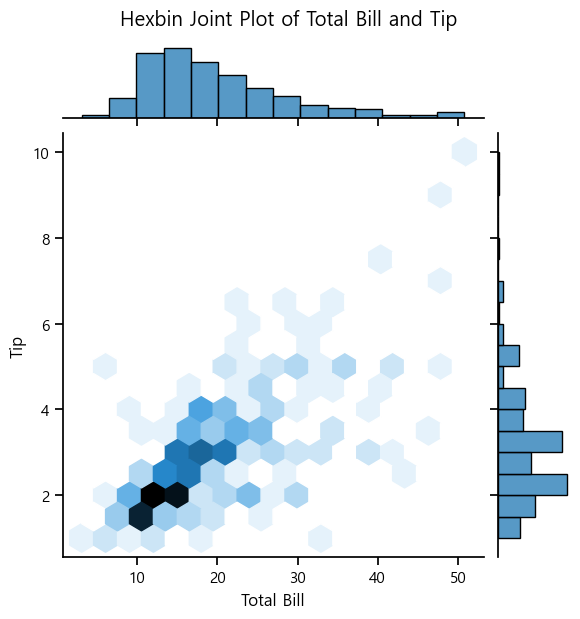

In [55]:
hexbin = sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.figure.suptitle('Hexbin Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

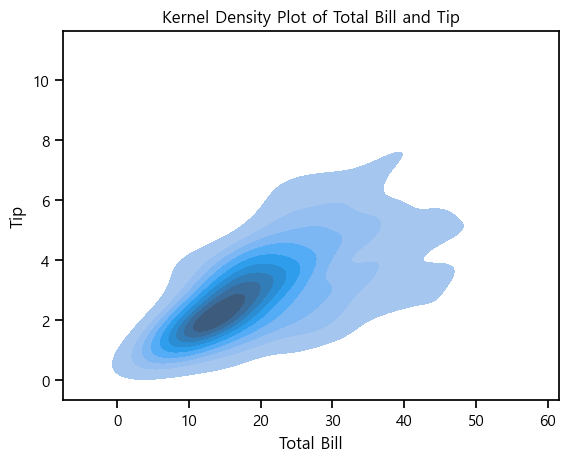

In [56]:
### 2차원 밀도분포 그래프

kde, ax = plt.subplots()

sns.kdeplot(data=tips, x="total_bill", y="tip", fill=True, ax=ax)

ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()


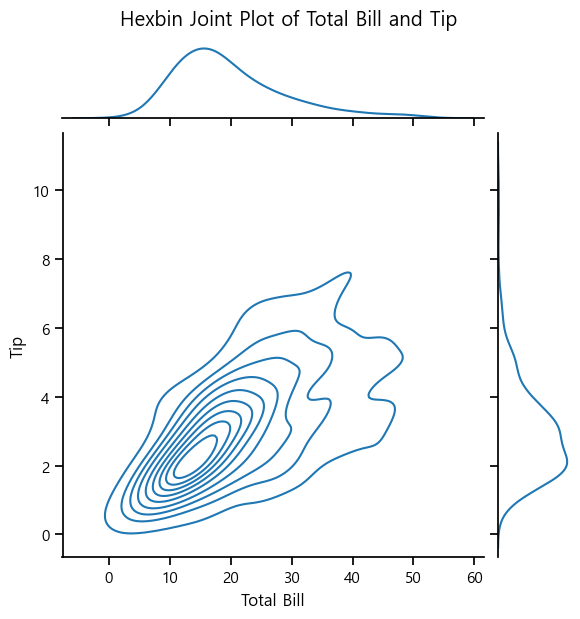

In [57]:
kde2d = sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")

kde2d.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
kde2d.figure.suptitle('Hexbin Joint Plot of Total Bill and Tip', y=1.03)

plt.show()

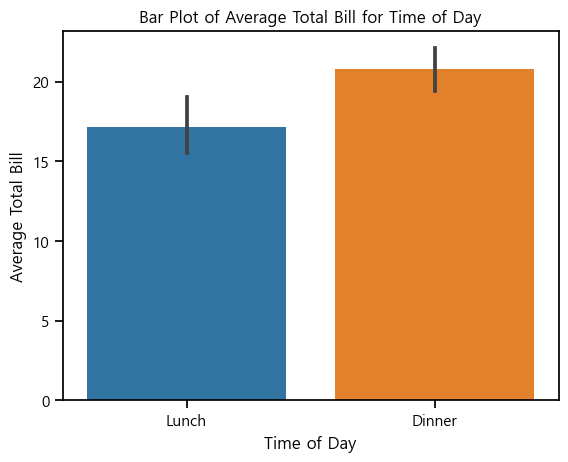

In [59]:
### 막대그래프 - 시간대별 평균 총 청구액

bar, ax = plt.subplots()

sns.barplot(data=tips, x="time", y="total_bill", estimator=np.mean, ax=ax)#, ci=None)

ax.set_title('Bar Plot of Average Total Bill for Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average Total Bill')

plt.show()

# estimator: 각 카테고리에 대한 추정량을 계산하는 함수를 지정
# Seaborn의 barplot 함수는 기본적으로 막대 위에 오차 막대(error bar)를 표시
# 각 막대의 높이를 추정하는 데 사용된 추정값 주변의 신뢰 구간을 나타낸다.
# 오차막대를 제거하려면 ci=None